### Metadata Dictionary
#### Temperature (numeric): The temperature in degrees Celsius, ranging from extreme cold to extreme heat.
#### Humidity (numeric): The humidity percentage, including values above 100% to introduce outliers.
#### Wind Speed (numeric): The wind speed in kilometers per hour, with a range including unrealistically high values.
#### Precipitation (%) (numeric): The precipitation percentage, including outlier values.
#### Cloud Cover (categorical): The cloud cover description.
#### Atmospheric Pressure (numeric): The atmospheric pressure in hPa, covering a wide range.
#### UV Index (numeric): The UV index, indicating the strength of ultraviolet radiation.
#### Season (categorical): The season during which the data was recorded.
#### Visibility (km) (numeric): The visibility in kilometers, including very low or very high values.
#### Location (categorical): The type of location where the data was recorded.
#### Weather Type (categorical): The target variable for classification, indicating the weather type.

In [6]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.express as px

[Plotly Official documentation](https://plotly.com/python/)

In [7]:
data = pd.read_csv('weather_classification_data.csv')

In [8]:
#Obtain the first 10 rows of data
data.head(10)

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
5,32.0,55,3.5,26.0,overcast,1010.03,2,Summer,5.0,inland,Cloudy
6,-2.0,97,8.0,86.0,overcast,990.87,1,Winter,4.0,inland,Snowy
7,3.0,85,6.0,96.0,partly cloudy,984.46,1,Winter,3.5,inland,Snowy
8,3.0,83,6.0,66.0,overcast,999.44,0,Winter,1.0,mountain,Snowy
9,28.0,74,8.5,107.0,clear,1012.13,8,Winter,7.5,coastal,Sunny


In [9]:
#Find the shape of the data
data.shape

(13200, 11)

In [10]:
#Find the datatypes of each column
data.dtypes

Temperature             float64
Humidity                  int64
Wind Speed              float64
Precipitation (%)       float64
Cloud Cover              object
Atmospheric Pressure    float64
UV Index                  int64
Season                   object
Visibility (km)         float64
Location                 object
Weather Type             object
dtype: object

### Observation: Out of 11 columns in the dataset, there are 7 numerical columns and 4 categorical columns.

In [11]:
data.isnull().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

### Observation: There are no missing values in the dataset.

In [12]:
#Obtain the summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [ ]:
#Try running this:
# corr = data.corr()
# corr

ValueError: could not convert string to float: 'partly cloudy'

In [14]:
#Finding the correlation matrix for numerical columns by filtering them out using select_dtypes
corr = data.select_dtypes(include='number').corr()
corr

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
Temperature,1.000000,-0.207969,-0.070022,-0.287206,0.209188,0.374773,0.250751
Humidity,-0.207969,1.000000,0.406079,0.638631,-0.120653,-0.342694,-0.479969
Wind Speed,-0.070022,0.406079,1.000000,0.443770,-0.077757,-0.068147,-0.311828
Precipitation (%),-0.287206,0.638631,0.443770,1.000000,-0.177444,-0.291601,-0.457444
Atmospheric Pressure,0.209188,-0.120653,-0.077757,-0.177444,1.000000,0.154128,0.120182
UV Index,0.374773,-0.342694,-0.068147,-0.291601,0.154128,1.000000,0.362922
Visibility (km),0.250751,-0.479969,-0.311828,-0.457444,0.120182,0.362922,1.000000


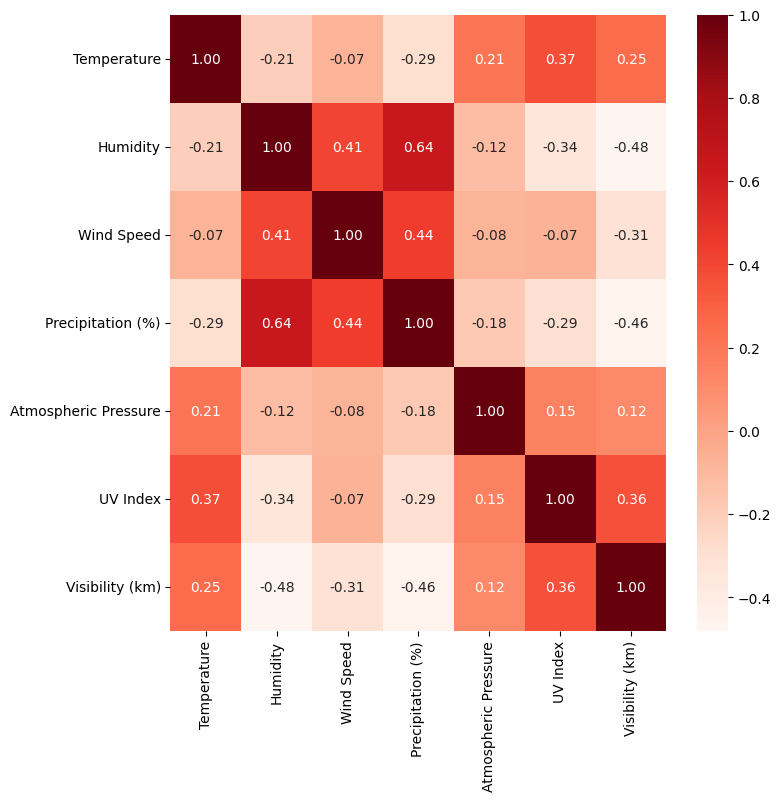

In [15]:
#Visualizing the correlation matrix
plt.figure(figsize=(8, 8))
sb.heatmap(corr, annot=True, cmap='Reds', fmt='.2f')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### Observation: The highest correlation coefficient of 0.64 is present between humidity and precipitation(%). 
### The next highest of 0.46 is present between visibility and precipitation(%)

In [16]:
#Find the descriptive statistics
data.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


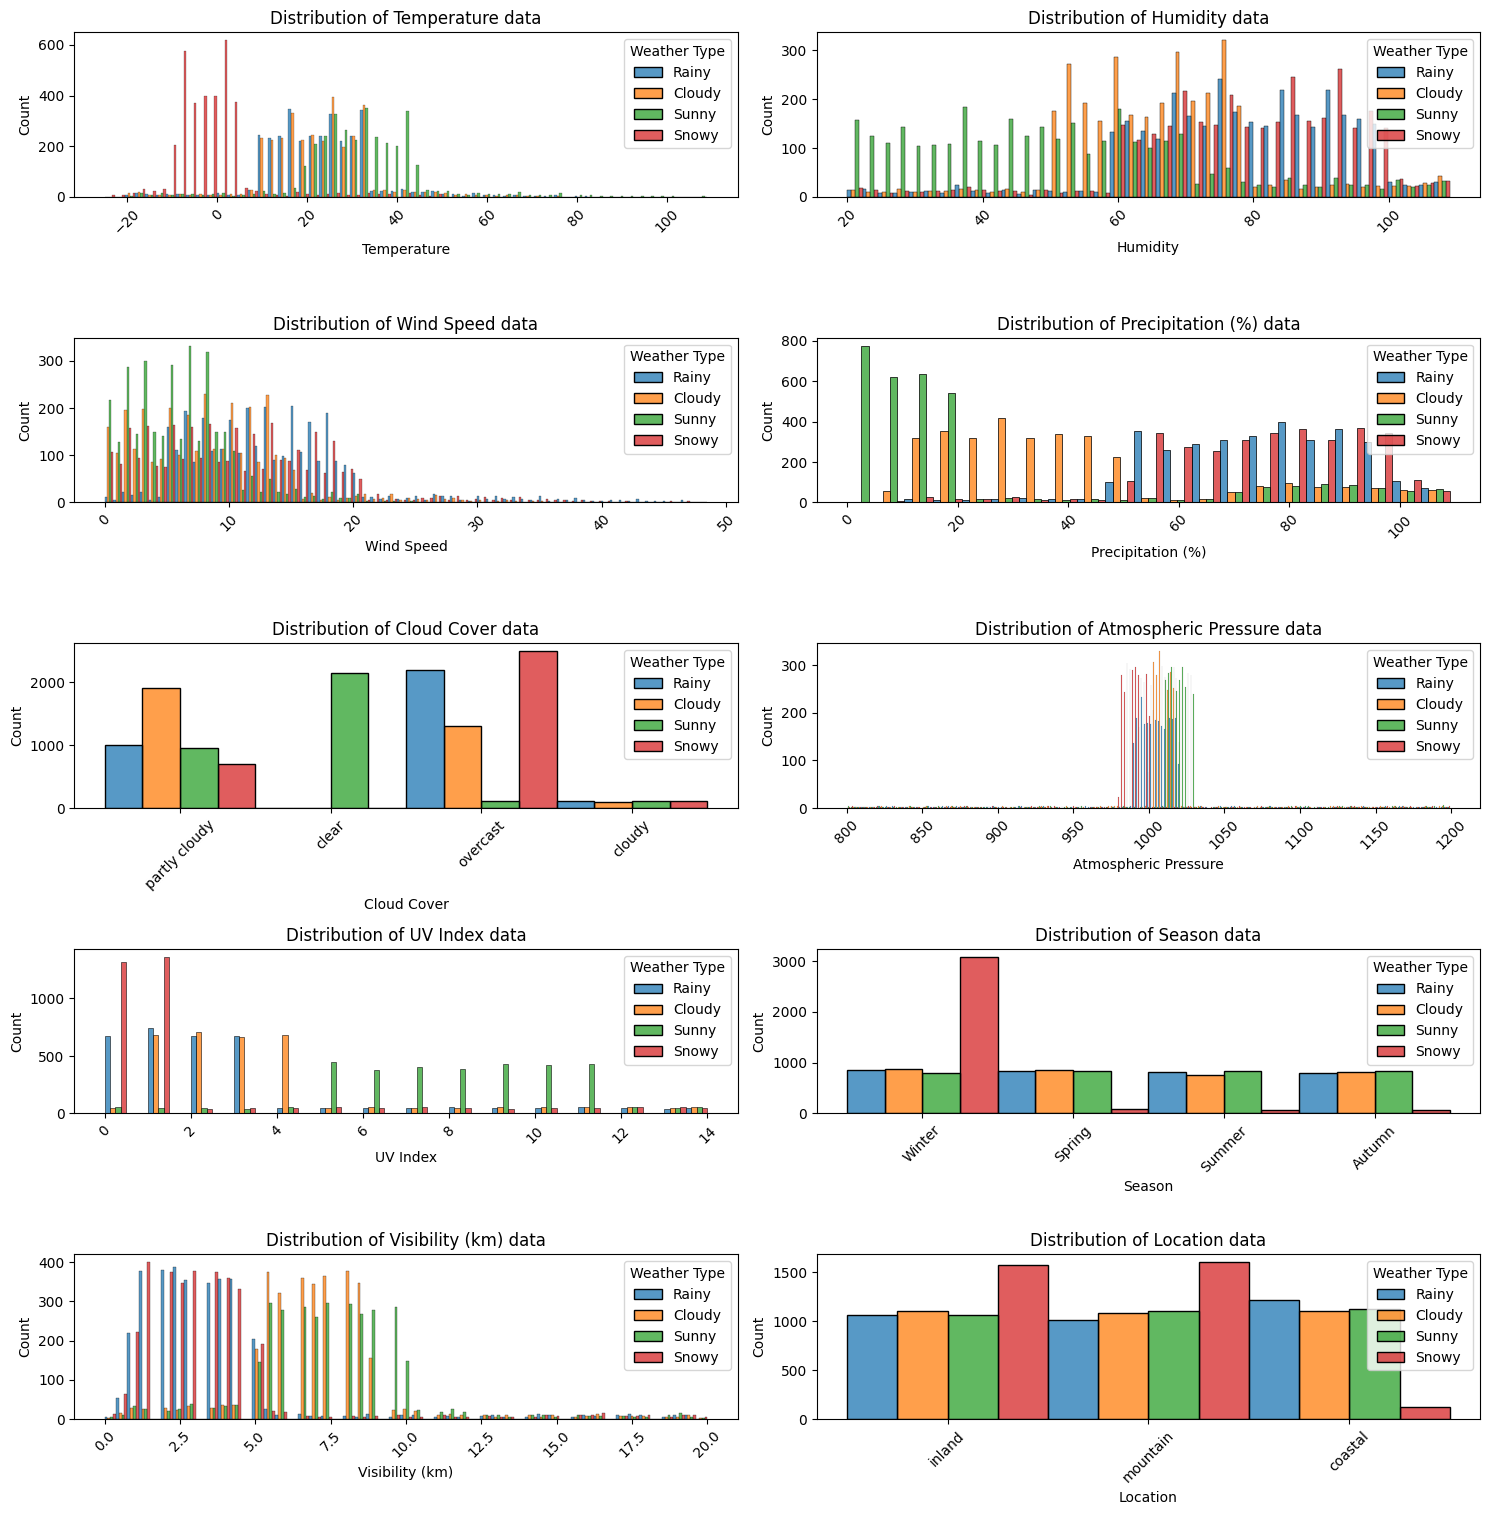

In [17]:
#Visualize the relation between each independent feature with respect to the target feature
plt.figure(figsize = (15, 15))
#Enumerate will iterate through all the columns except the last column(data.columns[:-1]) and moves to the next element using the increment 1.
for i, col in enumerate(data.columns[:-1], 1):
    plt.subplot(5, 2, i)
    sb.histplot(x = data[col], hue = data["Weather Type"], multiple= "dodge")
    plt.title(f"Distribution of {col} data")
    plt.tight_layout()
    plt.xticks(rotation = 45)
    plt.plot()

### Note: 'multiple' parameter in the histplot can take {'layer'(default), 'dodge', 'stack', 'fill'}. Try each and every mode and see the difference in the visualizations.

### Observation:
Most temperature were ranged between -10 ~ 20 Celcius degree.¶
Generally humidity is below 50% on sunny day, but other weather are over 50%.
Wind speed usually is below 20 km/h.
On sunny and cloudy, precipitation is usually average. But on rainy and snowy, it is opposite.
UV index is higher on sunny than other weather types.
Rainy/Cloudy/Sunny types are alike on all season, but snowy type is different.
On sunny and cloudy, it is more visible than rainy and snowy.
Rainy/Cloudy/Sunny types are alike on all location, but snowy type is different.

In [21]:
loc_cloud_fig = px.sunburst(data, path = ["Location", "Cloud Cover"])
loc_cloud_fig.update_traces(textinfo = "label + percent parent")
loc_cloud_fig.update_layout(title = "Cloud Cover per location",
                            font = {'size' : 25, 'family' : 'Serif'},
                            width = 500, height = 500)
loc_cloud_fig.show()


In [23]:
season_cloud_fig = px.sunburst(data, path = ["Season", "Cloud Cover"])
season_cloud_fig.update_traces(textinfo = "label + percent parent")
season_cloud_fig.update_layout(title = "Cloud Cover by season",
                               font = {'size' : 25, 'family' : 'Serif'},
                               width = 500, height = 500)
season_cloud_fig.show()


In [24]:
data.head(10)

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
5,32.0,55,3.5,26.0,overcast,1010.03,2,Summer,5.0,inland,Cloudy
6,-2.0,97,8.0,86.0,overcast,990.87,1,Winter,4.0,inland,Snowy
7,3.0,85,6.0,96.0,partly cloudy,984.46,1,Winter,3.5,inland,Snowy
8,3.0,83,6.0,66.0,overcast,999.44,0,Winter,1.0,mountain,Snowy
9,28.0,74,8.5,107.0,clear,1012.13,8,Winter,7.5,coastal,Sunny


## Label Encoding

In [25]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in ['Cloud Cover', 'Season', 'Location', 'Weather Type']:
    data[i] = le.fit_transform(data[i])

In [26]:
data.head(10)

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,3,1010.82,2,3,3.5,1,1
1,39.0,96,8.5,71.0,3,1011.43,7,1,10.0,1,0
2,30.0,64,7.0,16.0,0,1018.72,5,1,5.5,2,3
3,38.0,83,1.5,82.0,0,1026.25,7,1,1.0,0,3
4,27.0,74,17.0,66.0,2,990.67,1,3,2.5,2,1
5,32.0,55,3.5,26.0,2,1010.03,2,2,5.0,1,0
6,-2.0,97,8.0,86.0,2,990.87,1,3,4.0,1,2
7,3.0,85,6.0,96.0,3,984.46,1,3,3.5,1,2
8,3.0,83,6.0,66.0,2,999.44,0,3,1.0,2,2
9,28.0,74,8.5,107.0,0,1012.13,8,3,7.5,0,3


In [27]:
#Check the correlation of each independent variable with respect to the target variable
corr = data.corr()
corr['Weather Type'].sort_values(ascending=False)

Weather Type            1.000000
UV Index                0.345804
Season                  0.118791
Location                0.071665
Visibility (km)         0.047448
Atmospheric Pressure    0.030679
Temperature             0.028923
Precipitation (%)      -0.161578
Wind Speed             -0.166485
Humidity               -0.250558
Cloud Cover            -0.536681
Name: Weather Type, dtype: float64

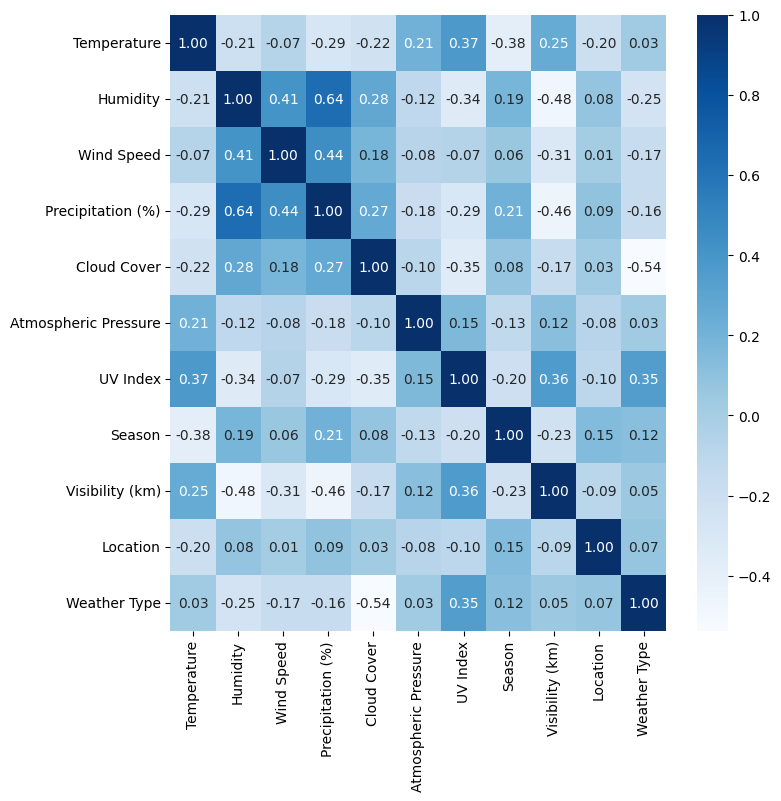

In [28]:
#Visualize the correlation matrix
plt.figure(figsize=(8,8))
sb.heatmap(corr, annot=True, cmap='Blues', fmt='.2f')
plt.show()

### Observation: Weather Type has highest correlation coefficient of 0.35 with UV Index

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Temperature'),
  Text(1, 0, 'Humidity'),
  Text(2, 0, 'Wind Speed'),
  Text(3, 0, 'Precipitation (%)'),
  Text(4, 0, 'Cloud Cover'),
  Text(5, 0, 'Atmospheric Pressure'),
  Text(6, 0, 'UV Index'),
  Text(7, 0, 'Season'),
  Text(8, 0, 'Visibility (km)'),
  Text(9, 0, 'Location'),
  Text(10, 0, 'Weather Type')])

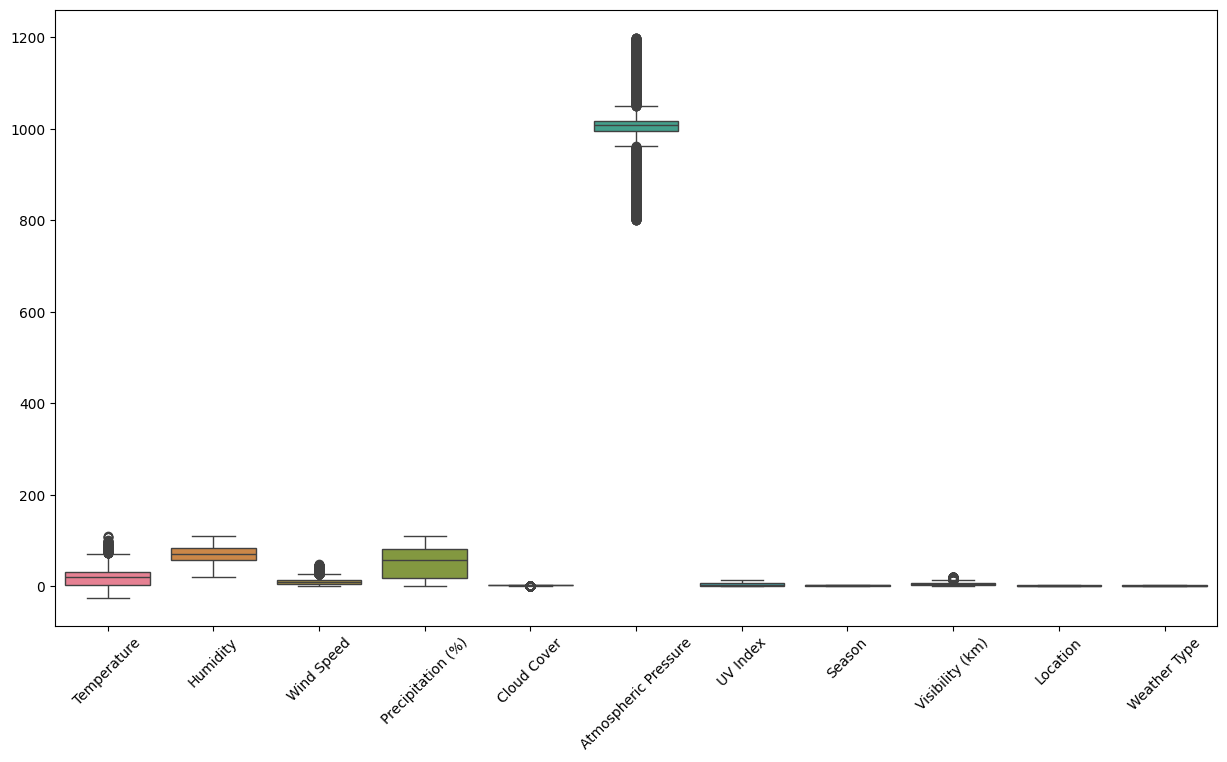

In [29]:
#Visualize the box plot for each column
plt.figure(figsize=(15, 8))
sb.boxplot(data=data)
plt.xticks(rotation=45)

### Observation: Outliers are found in the columns 'Temperature', 'Wind Speed', 'Cloud Cover', 'Atmospheric Pressure' and 'Visibility (km)'

In [30]:
#Handle the outliers by replacing them with median
for i in ['Temperature', 'Wind Speed', 'Cloud Cover', 'Atmospheric Pressure', 'Visibility (km)']:
    q1 = data[i].quantile(0.25)
    q3 = data[i].quantile(0.75)
    iqr = q3 - q1
    lower_whisker = q1 - 1.5*iqr
    upper_whisker = q3 + 1.5*iqr
    median = data[i].median()
    data[i] = data[i].mask((data[i] < lower_whisker) | (data[i] > upper_whisker), median)
            

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Temperature'),
  Text(1, 0, 'Humidity'),
  Text(2, 0, 'Wind Speed'),
  Text(3, 0, 'Precipitation (%)'),
  Text(4, 0, 'Cloud Cover'),
  Text(5, 0, 'Atmospheric Pressure'),
  Text(6, 0, 'UV Index'),
  Text(7, 0, 'Season'),
  Text(8, 0, 'Visibility (km)'),
  Text(9, 0, 'Location'),
  Text(10, 0, 'Weather Type')])

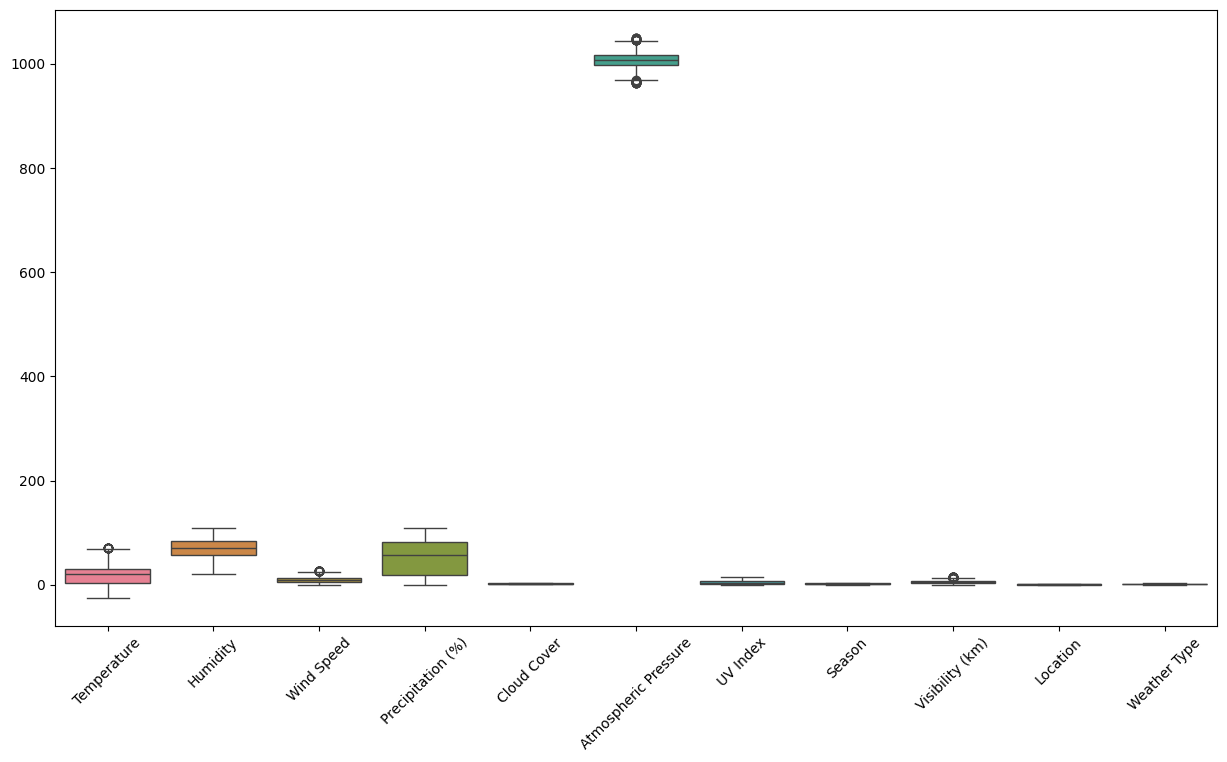

In [31]:
#Visualize the box plot for each column
plt.figure(figsize=(15, 8))
sb.boxplot(data=data)
plt.xticks(rotation=45)

In [32]:
data.head(10)

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,3,1010.82,2,3,3.5,1,1
1,39.0,96,8.5,71.0,3,1011.43,7,1,10.0,1,0
2,30.0,64,7.0,16.0,2,1018.72,5,1,5.5,2,3
3,38.0,83,1.5,82.0,2,1026.25,7,1,1.0,0,3
4,27.0,74,17.0,66.0,2,990.67,1,3,2.5,2,1
5,32.0,55,3.5,26.0,2,1010.03,2,2,5.0,1,0
6,-2.0,97,8.0,86.0,2,990.87,1,3,4.0,1,2
7,3.0,85,6.0,96.0,3,984.46,1,3,3.5,1,2
8,3.0,83,6.0,66.0,2,999.44,0,3,1.0,2,2
9,28.0,74,8.5,107.0,2,1012.13,8,3,7.5,0,3


### Split the data

In [33]:
from sklearn.model_selection import train_test_split

#Identify the independent and target features
X = data.drop('Weather Type', axis=1)
Y = data['Weather Type']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [34]:
print(f"Training data size: {X_train.shape[0]}")
print(f"Test data size: {X_test.shape[0]}")

Training data size: 10560
Test data size: 2640


### Feature Scaling

In [35]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)

In [36]:
print(type(X_train))

<class 'numpy.ndarray'>


In [37]:
X_train = pd.DataFrame(X_train, columns = X.columns)

In [38]:
X_test = pd.DataFrame(X_test, columns = X.columns)

In [39]:
X_train.head(10)

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location
0,0.795955,-0.129706,-0.565288,1.204747,1.296854,0.308301,-0.523097,-0.722447,-1.341491,-0.110882
1,-0.234290,1.352488,0.346620,0.109053,-0.600718,0.846919,-1.041944,-1.579066,-0.415454,1.149523
2,0.553545,-0.524958,-0.474097,-1.331000,-0.600718,1.514424,1.552291,0.134171,1.436621,-0.110882
3,1.704995,0.759610,-0.018143,0.985608,-0.600718,-1.119794,-0.523097,0.990790,-1.156284,-1.371288
4,-0.052482,-0.129706,0.893765,-1.362306,1.296854,-0.500820,-0.782520,-1.579066,1.066206,-1.371288
5,0.795955,-0.080300,-0.656479,-0.579668,1.296854,0.831803,-0.263673,0.990790,0.140168,-1.371288
6,1.038366,-0.426145,-0.747670,-1.362306,-0.600718,0.514360,1.292867,-0.722447,1.436621,1.149523
7,1.220174,-2.402403,-1.568387,-1.174473,-0.600718,1.512037,1.033444,0.134171,0.880998,1.149523
8,-0.113085,1.105456,2.535200,0.922997,-0.600718,-0.012325,1.292867,-0.722447,0.140168,1.149523
9,-0.658509,-0.920209,0.802574,-0.485751,1.296854,0.104628,1.811714,0.134171,-0.785869,1.149523
